In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to



In [8]:
train_df =  pd.read_csv('taxi fare dataset.csv')
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
        test_df = pd.read_csv('test.csv')
test_df.dtypes    

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
test_df.shape

(9914, 7)

In [10]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)
add_travel_vector_features(test_df)

In [11]:
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
abs_diff_longitude    0
abs_diff_latitude     0
dtype: int64


In [12]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 50000
New size: 50000


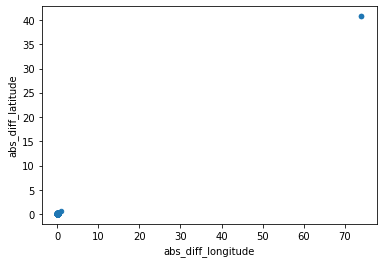

In [13]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [14]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 50000
New size: 49906


In [15]:
ls1 = list(train_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i] = ls1[i][11:-7:]
train_df['pickuptime'] = ls1

ls1 = list(test_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i] = ls1[i][11:-7:]
test_df['pickuptime'] = ls1

In [16]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51


In [17]:
ls1 = list(train_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i] = ls1[i][:-4:]
    ls1[i] = pd.Timestamp(ls1[i])
    ls1[i] = ls1[i].weekday()
train_df['weekday'] = ls1


ls1 = list(test_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i] = ls1[i][:-4:]
    ls1[i] = pd.Timestamp(ls1[i])
    ls1[i] = ls1[i].weekday()
test_df['weekday'] = ls1

In [18]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,1


In [19]:
train_df.drop('pickup_datetime', inplace = True, axis = 1)
test_df.drop('pickup_datetime', inplace = True, axis = 1)

In [20]:
train_df['weekday'].replace(to_replace = [i for i in range(0,7)], value = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)
test_df['weekday'].replace(to_replace = [i for i in range(0,7)], value = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)

In [21]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,weekday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,Monday
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,Tuesday
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,Thursday
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,Saturday
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,Tuesday


In [22]:
train_one_hot = pd.get_dummies(train_df['weekday'])
test_one_hot = pd.get_dummies(test_df['weekday'])
train_df = pd.concat([train_df, train_one_hot], axis = 1)
test_df = pd.concat([test_df, test_one_hot], axis = 1)

In [23]:
train_df.drop('weekday', inplace=True, axis=1)
test_df.drop('weekday', inplace=True, axis=1)

In [24]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,0,1,0,0,0,0,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,0,0,0,0,0,1,0
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,0,0,0,0,1,0,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,0,0,1,0,0,0,0
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,0,0,0,0,0,1,0


In [25]:
ls1 = list(train_df['pickuptime'])
for i in range(len(ls1)):
    z = ls1[i].split(':')
    ls1[i] = int(z[0])*100+int(z[1])
train_df['pickuptime'] = ls1
    
    
ls1 = list(test_df['pickuptime'])
for i in range(len(ls1)):
    z = ls1[i].split(':')
    ls1[i] = int(z[0])*100+int(z[1])
test_df['pickuptime'] = ls1

In [26]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726,0,1,0,0,0,0,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652,0,0,0,0,0,1,0
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35,0,0,0,0,1,0,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430,0,0,1,0,0,0,0
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751,0,0,0,0,0,1,0


In [30]:
R = 6373.0
lat1 = np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1 = []

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
distance = R * c

train_df['Distance'] = np.asarray(distance)*0.621




lat1 = np.asarray(np.radians(test_df['pickup_latitude']))
lon1 = np.asarray(np.radians(test_df['pickup_longitude']))
lat2 = np.asarray(np.radians(test_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1 = []

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
distance = R * c

test_df['Distance'] = np.asarray(distance)*0.621

In [28]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726,0,1,0,0,0,0,0,NaN
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652,0,0,0,0,0,1,0,316.933663
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35,0,0,0,0,1,0,0,NaN
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430,0,0,1,0,0,0,0,156.523055
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751,0,0,0,0,0,1,0,156.215667


In [29]:
R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

lat3=np.zeros(len(train_df))+np.radians(40.6413111)
lon3=np.zeros(len(train_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
train_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_df['pickup_latitude']))
lon1 = np.asarray(np.radians(test_df['pickup_longitude']))
lat2 = np.asarray(np.radians(test_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_df['dropoff_longitude']))

lat3=np.zeros(len(test_df))+np.radians(40.6413111)
lon3=np.zeros(len(test_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
test_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621

In [31]:
train_df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726,0,1,0,0,0,0,0,0.640305,6.523508,5.923206
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652,0,0,0,0,0,1,0,5.249180,13.367898,14.329642
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35,0,0,0,0,1,0,0,0.863166,13.544325,13.472164
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430,0,0,1,0,0,0,0,1.738893,12.651421,13.783538
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751,0,0,0,0,0,1,0,1.241866,13.248595,13.571182


In [32]:
train_df['Distance'] = np.round(train_df['Distance'],2)
train_df['Pickup_Distance_airport'] = np.round(train_df['Pickup_Distance_airport'],2)
train_df['Dropoff_Distance_airport'] = np.round(train_df['Dropoff_Distance_airport'],2)

test_df['Distance'] = np.round(test_df['Distance'],2)
test_df['Pickup_Distance_airport'] = np.round(test_df['Pickup_Distance_airport'],2)
test_df['Dropoff_Distance_airport'] = np.round(test_df['Dropoff_Distance_airport'],2)

In [33]:
train_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)
test_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [34]:
train_df.head()

,key,fare_amount,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2009-06-15 17:26:21.0000001,4.5,1,0.002701,0.009041,1726,0,1,0,0,0,0,0,0.64,6.52,5.92
1,2010-01-05 16:52:16.0000002,16.9,1,0.036780,0.070701,1652,0,0,0,0,0,1,0,5.25,13.37,14.33
2,2011-08-18 00:35:00.00000049,5.7,2,0.008504,0.010708,35,0,0,0,0,1,0,0,0.86,13.54,13.47
3,2012-04-21 04:30:42.0000001,7.7,1,0.004437,0.024949,430,0,0,1,0,0,0,0,1.74,12.65,13.78
4,2010-03-09 07:51:00.000000135,5.3,1,0.011440,0.015754,751,0,0,0,0,0,1,0,1.24,13.25,13.57


In [35]:
train_df['abs_diff_longitude']=np.abs(train_df['abs_diff_longitude']-np.mean(train_df['abs_diff_longitude']))
train_df['abs_diff_longitude']=train_df['abs_diff_longitude']/np.var(train_df['abs_diff_longitude'])


train_df['abs_diff_latitude']=np.abs(train_df['abs_diff_latitude']-np.mean(train_df['abs_diff_latitude']))
train_df['abs_diff_latitude']=train_df['abs_diff_latitude']/np.var(train_df['abs_diff_latitude'])

In [36]:
test_df.head()

,key,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2015-01-27 13:08:24.0000002,1,0.008110,0.019970,1308,0,0,0,0,0,1,0,1.44,13.27,12.79
1,2015-01-27 13:08:24.0000003,1,0.012024,0.019817,1308,0,0,0,0,0,1,0,1.51,12.19,13.39
2,2011-10-08 11:53:44.0000002,1,0.002870,0.005121,1153,0,0,1,0,0,0,0,0.38,13.12,12.80
3,2012-12-01 21:12:12.0000002,1,0.009288,0.016172,2112,0,0,1,0,0,0,0,1.22,13.76,13.48
4,2012-12-01 21:12:12.0000003,1,0.022519,0.045348,2112,0,0,1,0,0,0,0,3.35,14.21,13.12


In [37]:
print(train_df.shape)
print(test_df.shape)

(49906, 16)
(9914, 15)


In [38]:
from sklearn.model_selection import train_test_split
X = train_df.drop(['key','fare_amount'],axis=1)
Y = train_df['fare_amount']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.01, random_state=80)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))

0.6143654550752371
